In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('glass_data.csv')

In [ ]:
df

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.drop('column_a',axis=1,inplace=True)

In [ ]:
df

,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_b  214 non-null    float64
 1   column_c  214 non-null    float64
 2   column_d  214 non-null    float64
 3   column_e  214 non-null    float64
 4   column_f  214 non-null    float64
 5   column_g  214 non-null    float64
 6   column_h  214 non-null    float64
 7   column_i  214 non-null    float64
 8   column_j  214 non-null    float64
 9   column_k  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
X = df[['column_b','column_c','column_d','column_e','column_f','column_g','column_h','column_i','column_j']]
y = df['column_k']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,pred)

array([[12,  2,  0,  0,  0,  0],
       [ 7, 14,  0,  1,  0,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 1,  1,  0,  0,  0,  5]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.48      0.86      0.62        14
           2       0.74      0.64      0.68        22
           3       0.00      0.00      0.00         5
           5       0.67      0.67      0.67         3
           6       1.00      0.67      0.80         3
           7       1.00      0.71      0.83         7

    accuracy                           0.65        54
   macro avg       0.65      0.59      0.60        54
weighted avg       0.65      0.65      0.63        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
error_rate = []

for i in range(1,40):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train,y_train)

  pred_i = kn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

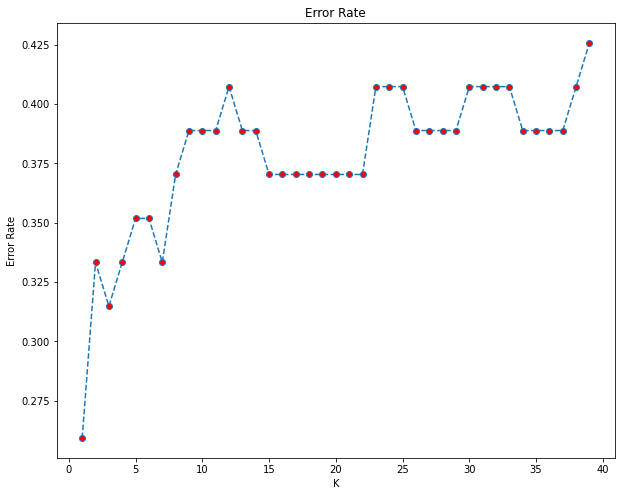

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,marker='o',linestyle='dashed',markerfacecolor='red')
plt.title('Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
kn = KNeighborsClassifier(n_neighbors=1)

kn.fit(X_train, y_train)

prediction = kn.predict(X_test)

print(confusion_matrix(y_test,prediction))

print(classification_report(y_test,prediction))

[[11  3  0  0  0  0]
 [ 4 16  0  1  1  0]
 [ 2  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 1  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.61      0.79      0.69        14
           2       0.76      0.73      0.74        22
           3       1.00      0.60      0.75         5
           5       0.75      1.00      0.86         3
           6       0.67      0.67      0.67         3
           7       1.00      0.71      0.83         7

    accuracy                           0.74        54
   macro avg       0.80      0.75      0.76        54
weighted avg       0.77      0.74      0.74        54

